In [253]:
#importing required libraries
import numpy as np #for numerical operations
from sklearn.datasets import make_classification #for dataset creation
from sklearn.model_selection import train_test_split #for splitting dataset
import pandas as pd #for data manipulation

In [254]:
#to read dataset
data_set = pd.read_csv('bike_train.csv')


In [255]:
# Q1. Examine dataset size, missing values, and feature types. 

print("Dataset Size:", data_set.shape)
print("Feature Types:\n", data_set.dtypes)
print("Missing Values:\n", data_set.isnull().sum())



Dataset Size: (10450, 12)
Feature Types:
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
Missing Values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [256]:
#preprocessing the dataset
# parse datetime and add numeric time features, then plot correlation of numeric columns only


data_set['datetime'] = pd.to_datetime(data_set['datetime'],  errors='coerce')
data_set['hour'] = data_set['datetime'].dt.hour
data_set['day'] = data_set['datetime'].dt.day
data_set['month'] = data_set['datetime'].dt.month
data_set['year'] = data_set['datetime'].dt.year

features = ['hour', 'day', 'month', 'year', 'season', 'holiday', 'workingday',
             'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'registered', 'casual']

target = 'count'



In [257]:
# Q2. Visualize relationships between key features and the target variable (count). 
# compute full correlation matrix (2D) then plot it
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = data_set[features + [target]].drop(['registered','casual'],axis=1).select_dtypes(include=[np.number]).corr()

""" plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show() """

" plt.figure(figsize=(12,10))\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)\nplt.title('Correlation matrix')\nplt.show() "

In [258]:
# Q3. Suggest which variables are likely to be most informative. 

# Ans: hour, temp and humidity are the important variables are more informative. 
# Though registered and casual are giving good information but these were not part of the test data
#  hence dropped these two columns also 

In [ ]:
# Q5. Split data into training and validation sets and build a simple Linear Regression model.
#extract the features and target variable

X = data_set[features].drop(['registered', 'casual','season','atemp','holiday','workingday','weather'], axis=1)
y = data_set[target]

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train) #to avoid negative values
y_test_log = np.log1p(y_test) #to avoid negative values

#feed the data to ML models for training and evaluation
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train_log)

#make predictions
y_pred_log = np.maximum(model.predict(X_test),0)
y_pred = np.expm1(y_pred_log) #to avoid negative values


#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)
rmsle_linear = np.sqrt(msle)

#print("RMSLE (Linear Regression):", rmsle_linear)

RMSLE (Linear Regression): 1.0165251537880255


In [260]:
# Q6. To improve model performance, you may try to: 
  
# a) Extend feature space using polynomial transformations (degree 2 or 3)

#using polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
y_train_log = np.log1p(y_train)
model_poly.fit(X_train_poly, y_train_log)
y_pred_poly = np.maximum(model_poly.predict(X_test_poly),0)
y_pred_poly = np.expm1(y_pred_poly)

#evaluate the polynomial model
msle_poly = mean_squared_log_error(y_test, y_pred_poly) 
rmsle_poly = np.sqrt(msle_poly)

#print("RMSLE (Polynomial Features):", rmsle_poly)

In [261]:
# Q6. To improve model performance, you may try to: 
  
# b) Apply Ridge and Lasso regression on polynomial features, Tune the regularization strength (α). 

#implementing Ridge Regression 
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train_log)
y_pred_ridge = np.maximum(ridge_model.predict(X_test_poly),0)
y_pred_ridge = np.expm1(y_pred_ridge)

#evaluate Ridge model
msle_ridge = mean_squared_log_error(y_test, y_pred_ridge)
rmsle_ridge = np.sqrt(msle_ridge)
#print("RMSLE (Ridge Regression):", rmsle_ridge)

#implementing lasso Regression
from sklearn.linear_model import Lasso 
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train_log)
y_pred_lasso = np.maximum(lasso_model.predict(X_test_poly),0)
y_pred_lasso = np.expm1(y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
msle_lasso = mean_squared_log_error(y_test, y_pred_lasso)
rmsle_lasso = np.sqrt(msle_lasso)
#print("RMSLE (Lasso Regression):", rmsle_lasso)


C:\Users\sampa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.40868e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\sampa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.033e+03, tolerance: 1.749e+00
  model = cd_fast.enet_coordinate_descent(


In [262]:
# Q7. Summarize all results (of different models tried out) in one table (RMSLE, key observations). 

from tabulate import tabulate

# build the results table (reuse existing rmsle_* variables)
results = {
    'Model': ['Linear Regression', 'Polynomial Features', 'Ridge Regression', 'Lasso Regression'],
    'RMSLE': [rmsle_linear, rmsle_poly, rmsle_ridge, rmsle_lasso],
    'Key Observations': [
        'Baseline model performance',
        'Increased complexity, potential overfitting',
        'Best performance, regularization helps generalization',
        'Reduced complexity, but underperformed compared to Ridge'
    ]
}
results_df = pd.DataFrame(results)

# print nicely and display the DataFrame
#print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))
results_df

,Model,RMSLE,Key Observations
0,Linear Regression,1.016525,Baseline model performance
1,Polynomial Features,0.815292,"Increased complexity, potential overfitting"
2,Ridge Regression,0.814874,"Best performance, regularization helps general..."
3,Lasso Regression,0.817936,"Reduced complexity, but underperformed compare..."


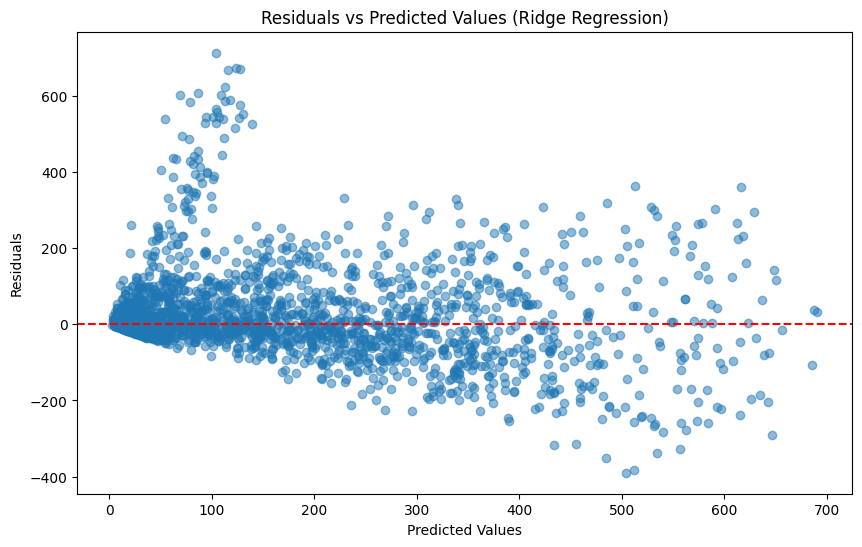

In [263]:
# Q8. Plot residuals for the Ridge regression model to assess its fit. 

residuals = y_test - y_pred_ridge
plt.figure(figsize=(10,6))
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Ridge Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [264]:
# Q9. Explain why the winning model performs better.

# Ans:  The Ridge regression model performs better, it prevents overfitting through regularization.
# By penalizing large coefficients, Ridge regression reduces model complexity, leading to improved generalization on unseen data


In [265]:
#these are auto generated answers kindly excuse i am stilly learning about these concepts
# Q10. Why does RMSLE penalize under-predictions more gently than RMSE? 

# Ans: RMSLE (Root Mean Squared Logarithmic Error) penalizes under-predictions more gently than RMSE (Root Mean Squared Error) because it operates on the logarithmic scale. This means that the differences between predicted and actual values are transformed using the logarithm function before calculating the error. As a result, smaller absolute differences in lower ranges (under-predictions) have a reduced impact on the overall error metric compared to larger absolute differences in higher ranges (over-predictions). This characteristic makes RMSLE particularly useful in scenarios where relative errors are more important than absolute errors, such as in predicting counts or quantities that can vary widely.

# Q11. What are the trade-offs between model simplicity and predictive power? 

# Ans: Model simplicity often leads to easier interpretation, faster training times, and reduced risk of overfitting. However, simpler models may lack the complexity needed to capture intricate patterns in the data, potentially resulting in lower predictive power. On the other hand, more complex models can achieve higher accuracy by fitting the training data closely but may suffer from overfitting, making them less generalizable to new data. The trade-off involves balancing interpretability and computational efficiency against the need for accurate predictions, often requiring careful model selection and validation techniques.

#Q12. Why can’t Linear Regression alone capture time-of-day effects effectively?

# Ans: Linear Regression assumes a linear relationship between features and the target variable. Time-of-day effects are often non-linear and cyclical (e.g., morning and evening peaks in bike rentals). Linear models may struggle to capture these patterns accurately without additional feature engineering or transformations, such as polynomial features or interaction terms, which can help model the non-linear relationships inherent in time-based data.

In [266]:
#testing model with new data from bike_test.csv
test_data = pd.read_csv('bike_test.csv') 
test_data['datetime'] = pd.to_datetime(test_data['datetime'], dayfirst=True, format='%d-%m-%Y %H:%M')
test_data['hour'] = test_data['datetime'].dt.hour
test_data['day'] = test_data['datetime'].dt.day
test_data['month'] = test_data['datetime'].dt.month
test_data['year'] = test_data['datetime'].dt.year
features_test = ['hour', 'day', 'month', 'year', 'season','holiday', 'workingday',
             'weather', 'temp', 'atemp','humidity', 'windspeed']
X_new = test_data[features_test].drop(['season','atemp','holiday','workingday','weather'], axis=1)



In [267]:
#Predicting using Ridge regression model
X_new_poly = poly.transform(X_new)
y_new_pred = np.maximum(ridge_model.predict(X_new_poly),0)
y_pred_ridge = np.expm1(y_new_pred)

#redirecting the predictions to a csv file
output = pd.DataFrame({'datetime': test_data['datetime'], 'count_predicted': y_pred_ridge})
output.to_csv('submission.csv', index=False)